## IMPORTING LIBRARIES : 

In [374]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

## [1] Discrete Fourier Transform:

#### (a) DFT Function :

In [375]:
def DFT(x,n):
    x_k =[]
    for k in range(len(x)):
        count = 0 
        for n in range(len(x)):
            count = count + x[n]*(np.exp(-1j*((2*np.pi)/len(x))*k*n))
        x_k.append(count)
    return np.asarray(x_k)

#### (b) IDFT Function : 

In [376]:
def IDFT(x,n):
    x_n=[]
    for k in range(len(x)):
        count = 0
        for i in range(len(x)):
            count = count + x[i]*(np.exp(1j*((2*np.pi)/len(x))*k*i))
        x_n.append(count/len(x))
    return np.asarray(x_n)

#### (c) Circular Convolution Function  : 

In [377]:
def cconv(x,h):
    n1=len(x)
    n2 = len(h)
    n = max(n1,n2)
    x = np.pad(x,(0,n-n1),'constant')
    h = np.pad(h,(0,n-n2),'constant')
    y = [0 for i in range(n)]
    for i in range(n1):
        for j in range(n2):
            t = (i+j)%n
            y[t] += x[i]*h[j]
    return y

#### (d) Find the circular convolution of

x = [1, 2, 3, 0, 0, 0, 0] and

h = [1, 1, 1, 1, 1, 1, 1]
using the function.

In [378]:
h = [1, 1, 1, 1, 1, 1, 1]
x=[1, 2, 3, 0,0, 0, 0]
convolution=cconv(x,h)
print("circular convolution is :",convolution)

circular convolution is : [6, 6, 6, 6, 6, 6, 6]


#### (e) A signal is given as x(t) = cos2πf t where f = 30 Hz. 
The signal is sampled at 100 times per second for 0.91 seconds and then its DFT is computed. 

Plot the spectrum versus frequency in Hz.

What is the magnitude of DFT at 35 Hz? Is this value non-zero? If so then why?

magnitude of DFT at 35 Hz: 2.048769606241617


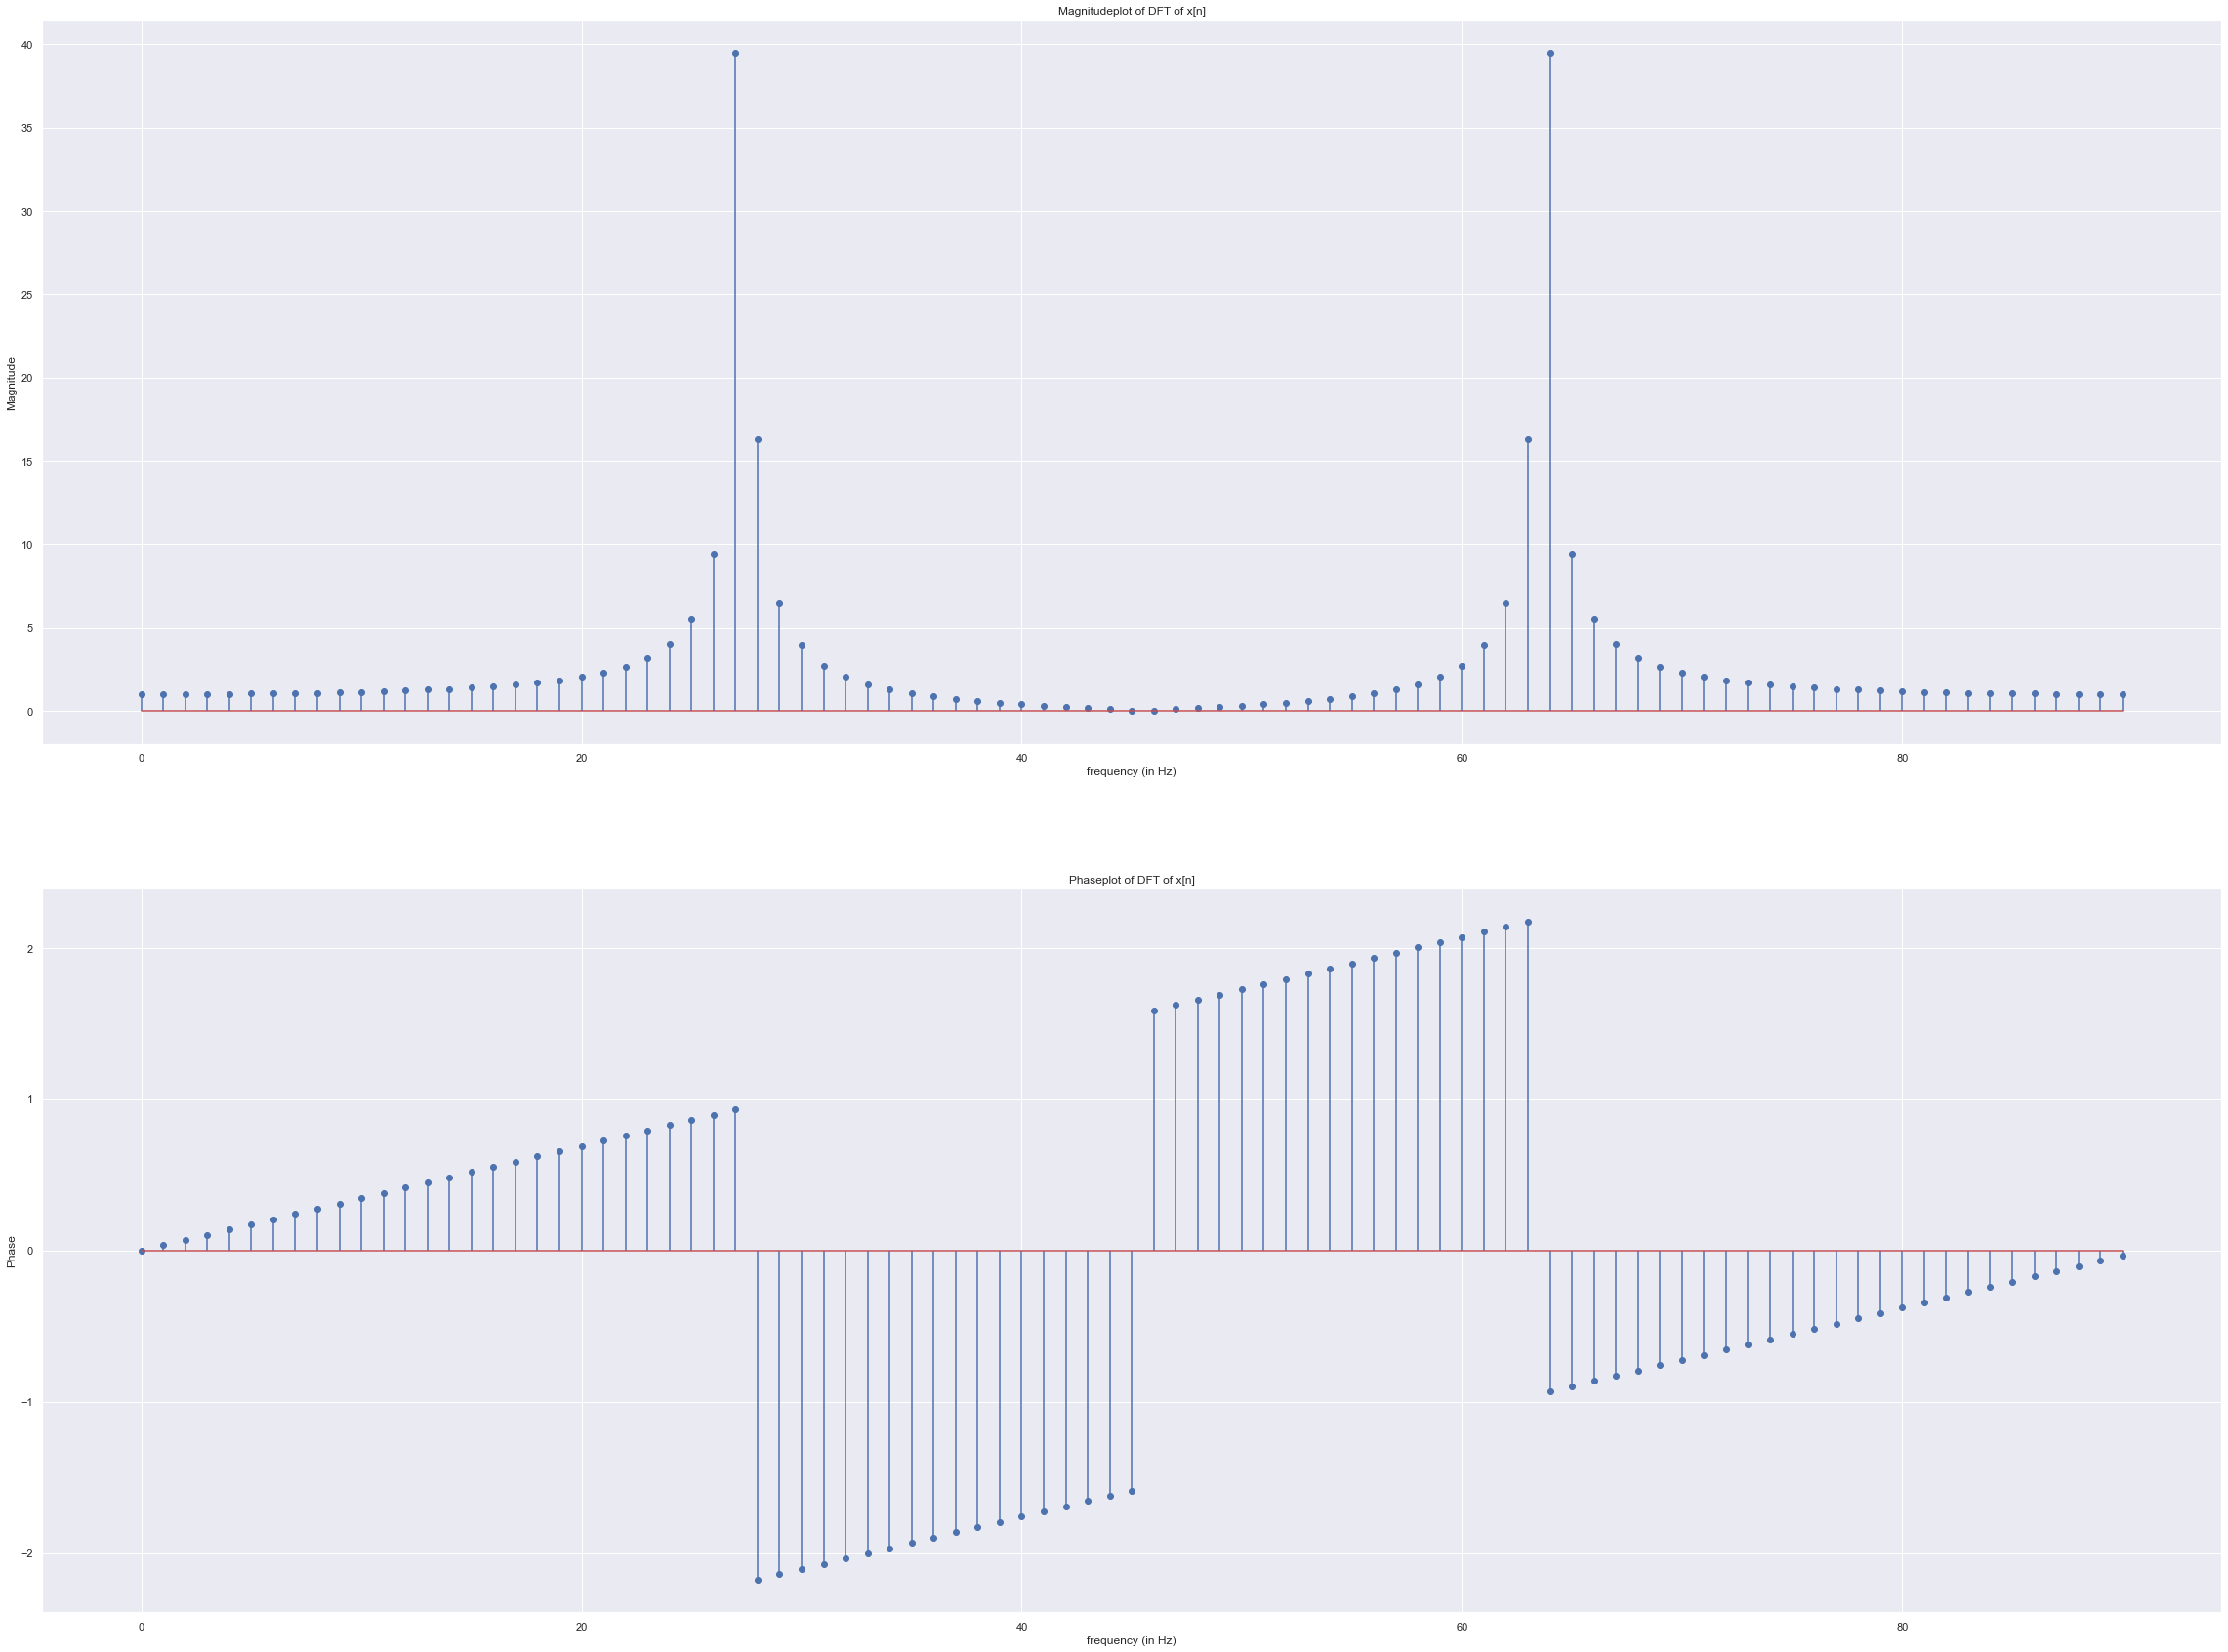

In [379]:
f = 30 # Frequency 
fs = 100 # Sampling frequency
T = 0.91 
t = np.arange(0,T,1/fs)
x = np.cos(2*np.pi*f*t)
dft_x = DFT(x,N)

lst = [np.abs(dft_x),np.angle(dft_x)]
name = ['Magnitude','Phase']
fig,ax = plt.subplots(2,1,figsize=(40, 30))
c =1
for i in range(len(lst)):
    plt.subplot(2,1,c)
    plt.stem(yvalues[i],use_line_collection=True)
    plt.title(str(name[i])+"plot of DFT of x[n]")
    plt.xlabel('frequency (in Hz)')
    plt.ylabel(name[i])
    c= c+1

N = T*fs # No. of samples of DFT
n = np.arange(N)
f_n = (n*fs)/N 
mag = abs(dft_x)[np.round(f_n)==35][0]
print("magnitude of DFT at 35 Hz:",mag)

#### (f) Consider the two sequences x = [1, −3, 1, 5] and y = [7, −7, −9, −3].

Does there exist a sequence h such that y is the circular convolution of x and h.

Find h using DFT and IDFT.

In [384]:
x = [7,-7,-9,-3]
y = [1,-3,1,5]
n = np.arange(0,len(x),1)
x1 = DFT(x,n)
y1 = DFT(y,n)
h = IDFT(y1/x1,n)
print('Impulse reponse of h[n] using DFT and IDFT is :\n ',np.real(h))
y_new = cconv(x,h)
print("y = x*h by circular convolution is :\n",np.real(y_new))
print("YES y is the circular convolution of x and h where h is calculated from DFT and IDFT ")

Impulse reponse of h[n] using DFT and IDFT is :
  [-0.0245098  -0.31862745 -0.14215686  0.15196078]
y = x*h by circular convolution is :
 [ 1. -3.  1.  5.]
YES y is the circular convolution of x and h where h is calculated from DFT and IDFT 


#### (g) Compute the energy of the signal x[n] = (3/4)nu[n] for 0 ≤ n ≤ 50.
If the DFT of this signal is X(k) then what is the energy of X(k) and

how does it relate to that of x[n].

In [385]:
def energy(x):
    enr = sum([x[i]**2 for i in range(len(x))])
    return enr
n = np.arange(0,51,1)
x = (3/4)**n
X = DFT(x,n)
energy1 = energy(x)
energy2 = energy(abs(X))
print("(energy in time domain) Ex[n]:",energy1)
print("(energy in frequency domain) Ex[w]:",energy2/len(x))

(energy in time domain) Ex[n]: 2.285714285713873
(energy in frequency domain) Ex[w]: 2.2857142857138726


#### (h) Is it possible to compute the DTFS coefficients of the square wave mentioned in Assignment-3 using the function written for DFT  as mentioned above.

If yes, then modify the function to compute the DTFS coefficients of the signal and show a labelled plot of the spectrum of these coefficients.

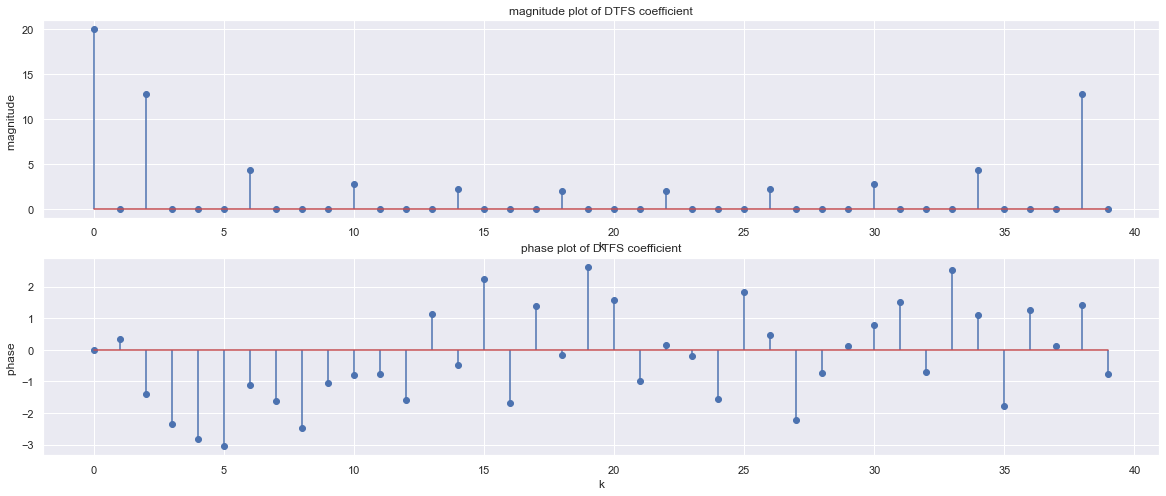

In [386]:
def square(period,N):
    k =int(N/period)
    n = np.arange(0,N,1)
    for i in range(period):
        sq_wave = np.array(([1]*k+[0]*k)*(i+1))  
    return sq_wave

def DTFS(x):
    a_k =[]
    for k in range(len(x)):
        count = 0 
        for n in range(len(x)):
            count = count + x[n]*(np.exp(-1j*((2*np.pi)/len(x))*k*n))
        a_k.append(count)
    return np.asarray(a_k)

x = square(2,20)
a = DTFS(x)
fig , ax = plt.subplots(nrows = 2, ncols = 1,figsize=(20,8))
lst = [abs(a),np.angle(a)]
name =["magnitude ","phase "]
c =1
for i in range(len(lst)):
    plt.subplot(2,1,c)
    plt.stem(lst[i],use_line_collection=True)
    plt.title(str(name[i])+"plot of DTFS coefficient")
    plt.xlabel("k")
    plt.ylabel(str(name[i]))
    c = c+1

## [2]  Discrete Cosine Transform:

#### (a) DCT Function :

In [387]:
def DCT(x_n,c):
    x_m=[]
    for m in range(len(x_n)):
        count=0
        for n in range(len(x_n)):
            count=count+ x_n[n]*c[m]*np.cos((np.pi*m*(2*n +1))/(2*len(x_n)))
        x1 = count*np.sqrt(2/len(x_n))
        x_m.append(x1)                     
    return x_m

#### (b) Consider a signal x[n] = [8, 16, 24, 32, 40, 48, 56, 64] of length N = 8. Compute the DCT of this signal. 

In [388]:
x=[8,16,24,32,40,48,56,64]
c = [0.707]
for i in range(len(x)-1):
    c.append(1)
    
dct_coeff=DCT(x,c)
print("DCT coefficient is :\n",dct_coeff)        

DCT coefficient is :
 [101.80799999999999, -51.53858418164109, -1.0658141036401503e-14, -5.387638407231517, 0.0, -1.6072232298879285, -2.1316282072803006e-14, -0.4056185820771887]


#### (c) Now keep only the first four DCT coefficients while discarding the rest and then compare its energy with that of x[n].

In [389]:
eng_time= energy(x)
eng_dct = energy(dct_coeff[:4])
print("energy of x in time domain E(x[n]) :",eng_time)
print("energy of x in DCT domain :",np.round(eng_dct,3))

energy of x in time domain E(x[n]) : 13056
energy of x in DCT domain : 13050.121


#### (d) IDCT Function : 

In [390]:
def IDCT(x_m,c):
    x_n=[]
    for n in range(len(x_m)):
        count=0
        for m in range(len(x_m)):
            count=count+ x_m[m]*c[m]*np.cos(((np.pi*m)/(2*len(x_m)))*(2*n+1))
        x1 = count*np.sqrt(2/len(x_m))
        x_n.append(x1)
    return np.asarray(x_n)

#### (e) Compute the inverse DCT of the sequence obtained and plot it alongside x[n]. Also compute the mean square error between the two signals.

original x[n] = [8, 16, 24, 32, 40, 48, 56, 64]
DCT of x[n] is X[m] = [101.81 -51.54  -0.    -5.39   0.    -1.61  -0.    -0.41]
IDCT of x[n] is x[n] = [ 7.99 15.99 23.99 31.99 39.99 47.99 55.99 63.99]


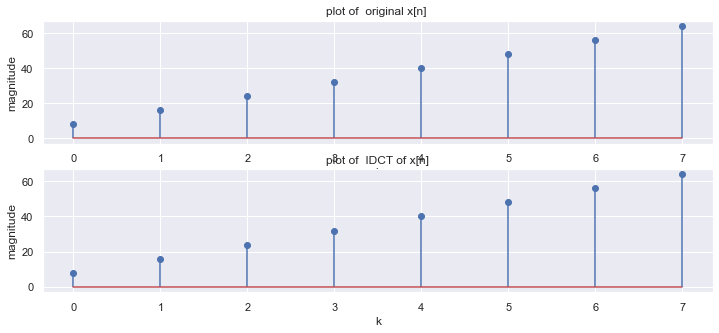

In [391]:
idct_coeff = IDCT(dct_coeff,c)
print("original x[n] =",x)
print("DCT of x[n] is X[m] =",np.round(dct_coeff,2))
print("IDCT of x[n] is x[n] =",np.round(idct_coeff,2))
fig , ax = plt.subplots(nrows = 2, ncols = 1,figsize=(12,5))
lst = [x,idct_coeff]
name =["original x[n] ","IDCT of x[n]"]
k =1
for i in range(len(lst)):
    plt.subplot(2,1,k)
    plt.stem(lst[i],use_line_collection=True)
    plt.title("plot of  "+str(name[i]))
    plt.xlabel("k")
    plt.ylabel("magnitude")
    k = k+1

#### (f) compute the mean square error between these two signals.¶

In [392]:
def mse(x,x_n):
    mean_err = sum([(x[i]-x_n[i])**2 for i in range(len(x))])/(len(x))
    return mean_err

mean_square_error_dct = mse(x,idct_coeff)
print("mean square error between x[n] and IDCT of x[n] is:",mean_square_error_dct)

mean square error between x[n] and IDCT of x[n] is: 0.00011820038400009882


#### (g) Now repeat the same process with DFT and compare the mean square errors. Comment on your observations

original x[n] : [8, 16, 24, 32, 40, 48, 56, 64]
DFT of x[n]: [288.    83.62  45.25  34.64  32.    34.64  45.25  83.62]
IDFT of x[n] : [ 8. 16. 24. 32. 40. 48. 56. 64.]
energy of x in time domain E(x[n]) : 13056
energy of x in DFT domain : 11648.0
mean square error between x[n] and IDFT of x[n] is: 5.507235194574189e-28


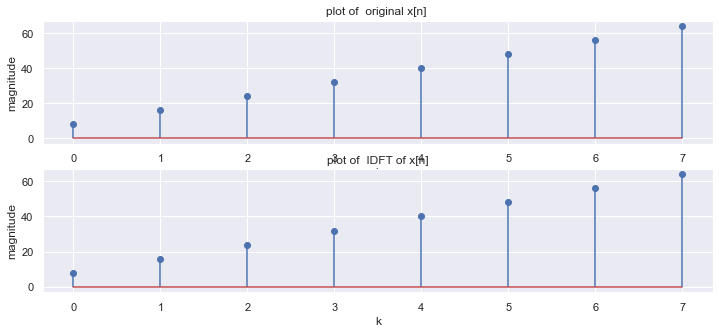

In [393]:
n = np.arange(0,len(x),1)
x=[8,16,24,32,40,48,56,64]
dft_x = DFT(x,n)
idft_x = IDFT(dft_x,n)
coeff = dct_coeff[:4]
eng_time = energy(x)
eng_dft = energy(abs(dft_x[:4]))
mean_square_error_dft = mse(x,abs(idft_x))

print("original x[n] :",x)
print("DFT of x[n]:",np.round(abs(dft_x),2))
print("IDFT of x[n] :",abs(idft_x))
print("energy of x in time domain E(x[n]) :",eng_time)
print("energy of x in DFT domain :",eng_dft/len(x))
print("mean square error between x[n] and IDFT of x[n] is:",mean_square_error_dft)

fig , ax = plt.subplots(nrows = 2, ncols = 1,figsize=(12,5))
lst = [x,np.abs(idft_x)]
name =["original x[n] ","IDFT of x[n]"]
k =1
for i in range(len(lst)):
    plt.subplot(2,1,k)
    plt.stem(lst[i],use_line_collection=True)
    plt.title("plot of  "+str(name[i]))
    plt.xlabel("k")
    plt.ylabel("magnitude")
    k = k+1

#### Observation :
[1] The Mean Square Error between original x[n] and DCT of x[n] is very large 
whereas the Mean Square Error between original x[n] and DFT of x[n] is very small.

[2] The difference between energy of  DFT and DCT is not that much larger as the difference between mean square error of them but the energy of DCT is very much close to energy of original signal i.e DCT perserve the most of energy of original signal .